In [56]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
diabetes = load_breast_cancer()
data = diabetes.data
labels = diabetes.target
features = diabetes.feature_names

In [15]:
df = pd.DataFrame(data, columns=features)
df['target'] = labels
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [17]:
# build a classifier using a train/test split
xtrain, xtest, ytrain, ytest = train_test_split(data, labels, train_size = 0.80)

In [18]:
clf = RandomForestClassifier()

In [20]:
clf.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
ytest_preds = clf.predict(xtest)
ytrain_preds = clf.predict(xtrain)

In [28]:
cm = confusion_matrix(ytest, ytest_preds)
cm2 = confusion_matrix(ytrain, ytrain_preds)

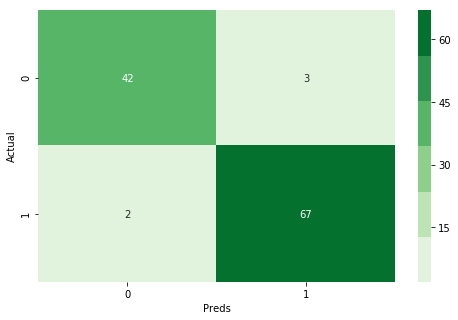

In [45]:
def make_confusion(cm):
    plt.figure(figsize=(8, 5))
    sns.heatmap(cm, annot=True, cmap=sns.color_palette('Greens'), fmt='1g')
    plt.xlabel("Preds")
    plt.ylabel("Actual")
    plt.show()
make_confusion(cm)

In [34]:
42/len(ytrain)*0 + 3/len(ytrain) * -1000 + 2/len(ytrain)*-100000 + 67/len(ytrain)

-446.15384615384613

In [36]:
preds = clf.predict_proba(data)
preds

array([[0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ]])

In [37]:
df['preds_0'] = preds[:, 0]
df['preds_1'] = preds[:, 1]

In [38]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,preds_0,preds_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,0.8,0.2
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,1.0,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,1.0,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,0.8,0.2
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,0.8,0.2


In [40]:
df.loc[(df.preds_0 >= 0.50) & (df.target == 1)]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,preds_0,preds_1
112,14.26,19.65,97.83,629.9,0.07837,0.22330,0.3003,0.07798,0.1704,0.07769,...,709.0,0.08949,0.4193,0.6783,0.15050,0.2398,0.10820,1,0.5,0.5
157,16.84,19.46,108.40,880.2,0.07445,0.07223,0.0515,0.02771,0.1844,0.05268,...,1032.0,0.08774,0.1710,0.1882,0.08436,0.2527,0.05972,1,0.7,0.3
541,14.47,24.99,95.81,656.4,0.08837,0.12300,0.1009,0.03890,0.1872,0.06341,...,808.9,0.13400,0.4202,0.4040,0.12050,0.3187,0.10230,1,0.5,0.5


In [41]:
# change our threshold to 0.30
def get_labels(clf, data, threshold=0.50):
    labels = []
    preds = clf.predict_proba(data)
    for pred in preds:
        if pred[1] >=threshold:
            labels.append(1)
        else:
            labels.append(0)
    return np.array(labels)

In [43]:
l30 = get_labels(clf, xtrain, threshold=0.30)

In [44]:
cm30 = confusion_matrix(ytrain, l30)

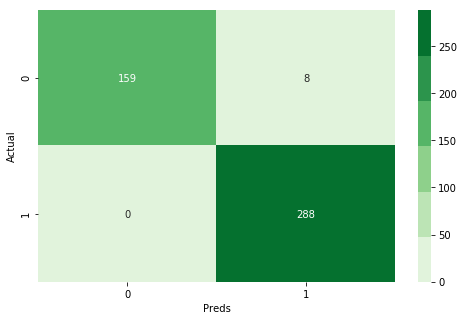

In [46]:
make_confusion(cm30)

In [55]:
79/len(ytrain)*0 + 80/len(ytrain) * -1000 + 0/len(ytrain)*-100000 + 288/len(ytrain)*1000000

632791.2087912088

In [53]:
recall_score(ytrain, l30), precision_score(ytrain, l30), accuracy_score(ytrain, l30)

(1.0, 0.972972972972973, 0.9824175824175824)

In [58]:
print(classification_report(ytrain, l30))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       167
           1       0.97      1.00      0.99       288

    accuracy                           0.98       455
   macro avg       0.99      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455

